# What is a GWAS?

> **Information about this notebooks**
>
> Over the past two decades, there has been an increasing interest in
> investigating the influence of genetic risk factors on various human
> traits. The technical and analytic tools required to conduct genetic
> studies have become increasingly accessible, which holds great
> promise. However, performing genetic association studies properly is
> complex and requires specific knowledge of genetics, statistics, and
> (bio)informatics.
>
> This course will introduce key concepts and provide guidelines for
> building a reusable workflow for Genome-Wide association studies
> (GWAS) by progressively describing all necessary steps in a typical
> GWAS analysis. This notebook is read-only, while the others are
> hands-on practical exercises using R and the Linux command line.
>
> ## Learning outcomes
>
> -   **Recognize and discuss** the basic terminology and GWAS
>     principles
> -   **Identify** the main steps of a typical GWAS analysis

## What is a genome-wide association study?

A Genome-Wide Association Study (GWAS) aims to link genotype and
phenotype information by identifying genetic variants that have a
statistical association with a trait. A **phenotype**, also called
**trait**, can be any measured or observed property of an individual.
Phenotypes can include quantitative traits, like standing height or body
mass index (BMI), as well as binary traits, such as diagnoses of
multiple sclerosis or schizophrenia.

GWAS are used to explore the genetic architecture of complex traits and
address questions about the distribution of variants contributing to the
resulting phenotype, and their associated effect size on the trait. To
understand GWAS, it is important to familiarise yourself with the key
components and terminology involved in these studies:

### General concepts

-   **Monogenic phenotype** is determined by a single gene/locus.
-   **Oligogenic phenotype** is influenced by a handful of genes/loci.
-   **Polygenic phenotype** is influenced by many genes/loci.
-   **Complex trait** is a (quantitative) phenotype that is not
    monogenic such as anthropometric, lifestyle, or behavioural traits.
    Typically, it is polygenic and influenced by both genetic and
    environmental factors.
-   **Common disease** is a disease/condition which is common in the
    population (say, prevalence of 0.1% or more). Examples: Multiple
    sclerosis (also known as MS) (prevalence in the order of 0.1%),
    schizophrenia ($\sim 1\%$), or Type 2 diabetes ($\sim 10\%$).
-   **Common variant** has a frequency of at least 1% (commonly, 5% is
    also used as the threshold).
-   **Low-frequency variant** has a frequency of at least 0.1% and lower
    than a common variant.
-   **Rare variant** has a frequency lower than a low-frequency variant.

### Key concepts

GWAS have shown us that, in general, **complex traits and common
diseases are highly polygenic**, influenced by many common variants with
small effects. Identifying the exact causal variants for each phenotype
is challenging due to the correlation structure among genetic variants
(i.e., linkage disequilibrium, genetic interactions, etc.).
Additionally, understanding the impact of rare variants on phenotypes
requires very large sample sizes analyzed using genome sequencing
techniques, rather than just SNP arrays.

In GWAS, it is also crucial to account for potential **confounding
factors**. This refers to variables that are linked to both the genetic
variants and the trait of interest (i.e., population stratification).
Failing to control for these factors can lead to spurious relationships
between genetic variants and a trait. We’ll discuss how to address the
issue in notebook 4 (Quality control).

Here are some terms and concepts that you need to be familiar with: \*
**Population stratification** is the presence of multiple genetically
distinct subpopulations that differ in their average phenotypic values
(e.g., the distribution of north and south European individuals in PCA
and the height of those individuals). When not accounted for, this can
lead to spurious genetic associations. \* **Heritability** is the
proportion of variance of the phenotype that is due to genetic
differences between individuals (recommended article: Visscher, Hill,
and Wray (2008)). \* **Linkage disequilibrium, also known as LD,** is
the non-random association of alleles at different loci within a
population. LD arises because alleles that are physically close on the
same chromosome tend to be inherited together over generations (due to
limited recombination), leading to a non-independent assortment of
alleles at these loci. This means that certain genetic variants (SNPs,
for instance) that are physically close to each other on the genome are
often inherited together as a block. Tools like LDPred are key to
tackling this problem (recommended reading:
(**lvilhjalmsson2015modeling?**)). \* **Winner’s curse** effect size of
newly discovered alleles tends to be overestimated. \* **Multiple
testing** refers to the statistical issue that arises when conducting
multiple hypothesis tests simultaneously. In the context of GWAS,
millions of genetic variants are tested for association with a trait.
Researchers commonly apply the Bonferroni testing threshold by dividing
the significant threshold by the number of independent tests. We will
look further into other correction methods in Notebook 5. \* **Linear
regression** is the statistical method commonly used in GWAS to identify
genetic variants associated with traits.

> **Why mixed models are important**
>
> In this module, we will focus on linear models. However, it’s crucial
> to acknowledge the existence of other model types. The standard linear
> regression model becomes overly flexible and struggles to fit the data
> effectively as the number of SNPs increases, especially when effect
> sizes are unrestricted. High correlations among SNPs exacerbate
> overfitting issues in linear models.

### GWAS output

The primary outcome of GWAS is **summary statistics**, which consist of
a table detailing various attributes for each tested SNP, including the
**effect size**. This metric quantifies the magnitude of association
between the SNP and the trait, typically expressed as an odds ratio (OR)
for binary traits or beta coefficients for quantitative traits. The
summary statistics file includes essential information such as SNP ID,
SNP chromosome (CHR), genomic position, alleles, strand orientation,
effect size with standard error, P-value or test statistic, minor allele
frequency, and sample size.

Summary statistics can be used to calculate polygenic scores for a
particular trait. A polygenic score (PGS) is an expression of the
predicted genetic predisposition of an individual or a population of
having a trait. If the prediction is on a discrete phenotype such as a
disease, these scores are known as polygenic risk scores (PRS).

## GWAS examples

Now, let’s look at some recent examples of GWAS. There are two primary
types, a) studies focusing on quantitative traits and b) those
investigating disease phenotypes.

#### Example 1 QT-GWAS

GWAS on body-mass index (BMI) (Locke et al. 2015) combined data from
339,000 individuals from 125 studies around the world to explore the
relationship between genetic variants and BMI. This study identified 97
genomic regions strongly associated with BMI. Pathway analyses provided
evidence supporting the involvement of the central nervous system in
obesity susceptibility. Some of the newly identified candidates are
genes involved in pathways related to synaptic function, glutamate
signaling, insulin secretion/action, energy metabolism, lipid biology,
and adipogenesis.

<figure>
<img src="attachment:Images/BMI.png"
alt="Figure 2: Manhattan plot displaying the –log_{10} P-value of each SNP tested in a GWAS, such as the BMI study by Locke et al. (2015). Although Manhattan plots will be explained later in the course, the key idea is that by setting a genome-wide significance threshold at p=5e-8, equivalent to –log_{10}(p) = 7.3, we can identify variants significantly associated with the phenotype under study. In this plot, previously identified loci are shown in blue, new discoveries are in red, and each locus is labeled with a nearby gene (though the labeled gene may not necessarily be the causal one)." />
<figcaption aria-hidden="true">Figure 2: Manhattan plot displaying the
<span
class="math inline">–<em>l</em><em>o</em><em>g</em><sub>10</sub></span>
P-value of each SNP tested in a GWAS, such as the BMI study by <span
class="citation" data-cites="locke2015genetic">Locke et al.
(2015)</span>. Although Manhattan plots will be explained later in the
course, the key idea is that by setting a genome-wide significance
threshold at p=5e-8, equivalent to <span
class="math inline">–<em>l</em><em>o</em><em>g</em><sub>10</sub>(<em>p</em>)</span>
= 7.3, we can identify variants significantly associated with the
phenotype under study. In this plot, previously identified loci are
shown in blue, new discoveries are in red, and each locus is labeled
with a nearby gene (though the labeled gene may not necessarily be the
causal one).</figcaption>
</figure>

#### Example 2 Disease GWAS

GWAS on migraine (Gormley et al. 2016) combined genetic data on 60,000
cases (individuals with migraine) and 315,000 controls (individuals with
no known migraine) originating from 22 studies. Genetic data was
available on millions of genetic variants. At each variant, the genotype
distribution between cases and controls was compared. This study
identified 38 regions of the genome that showed a significant
statistical association with migraine. Downstream analyses integrated
these genes into pathways and cell types, revealing an enrichment of
signals near genes that are active in the vascular system.

<figure>
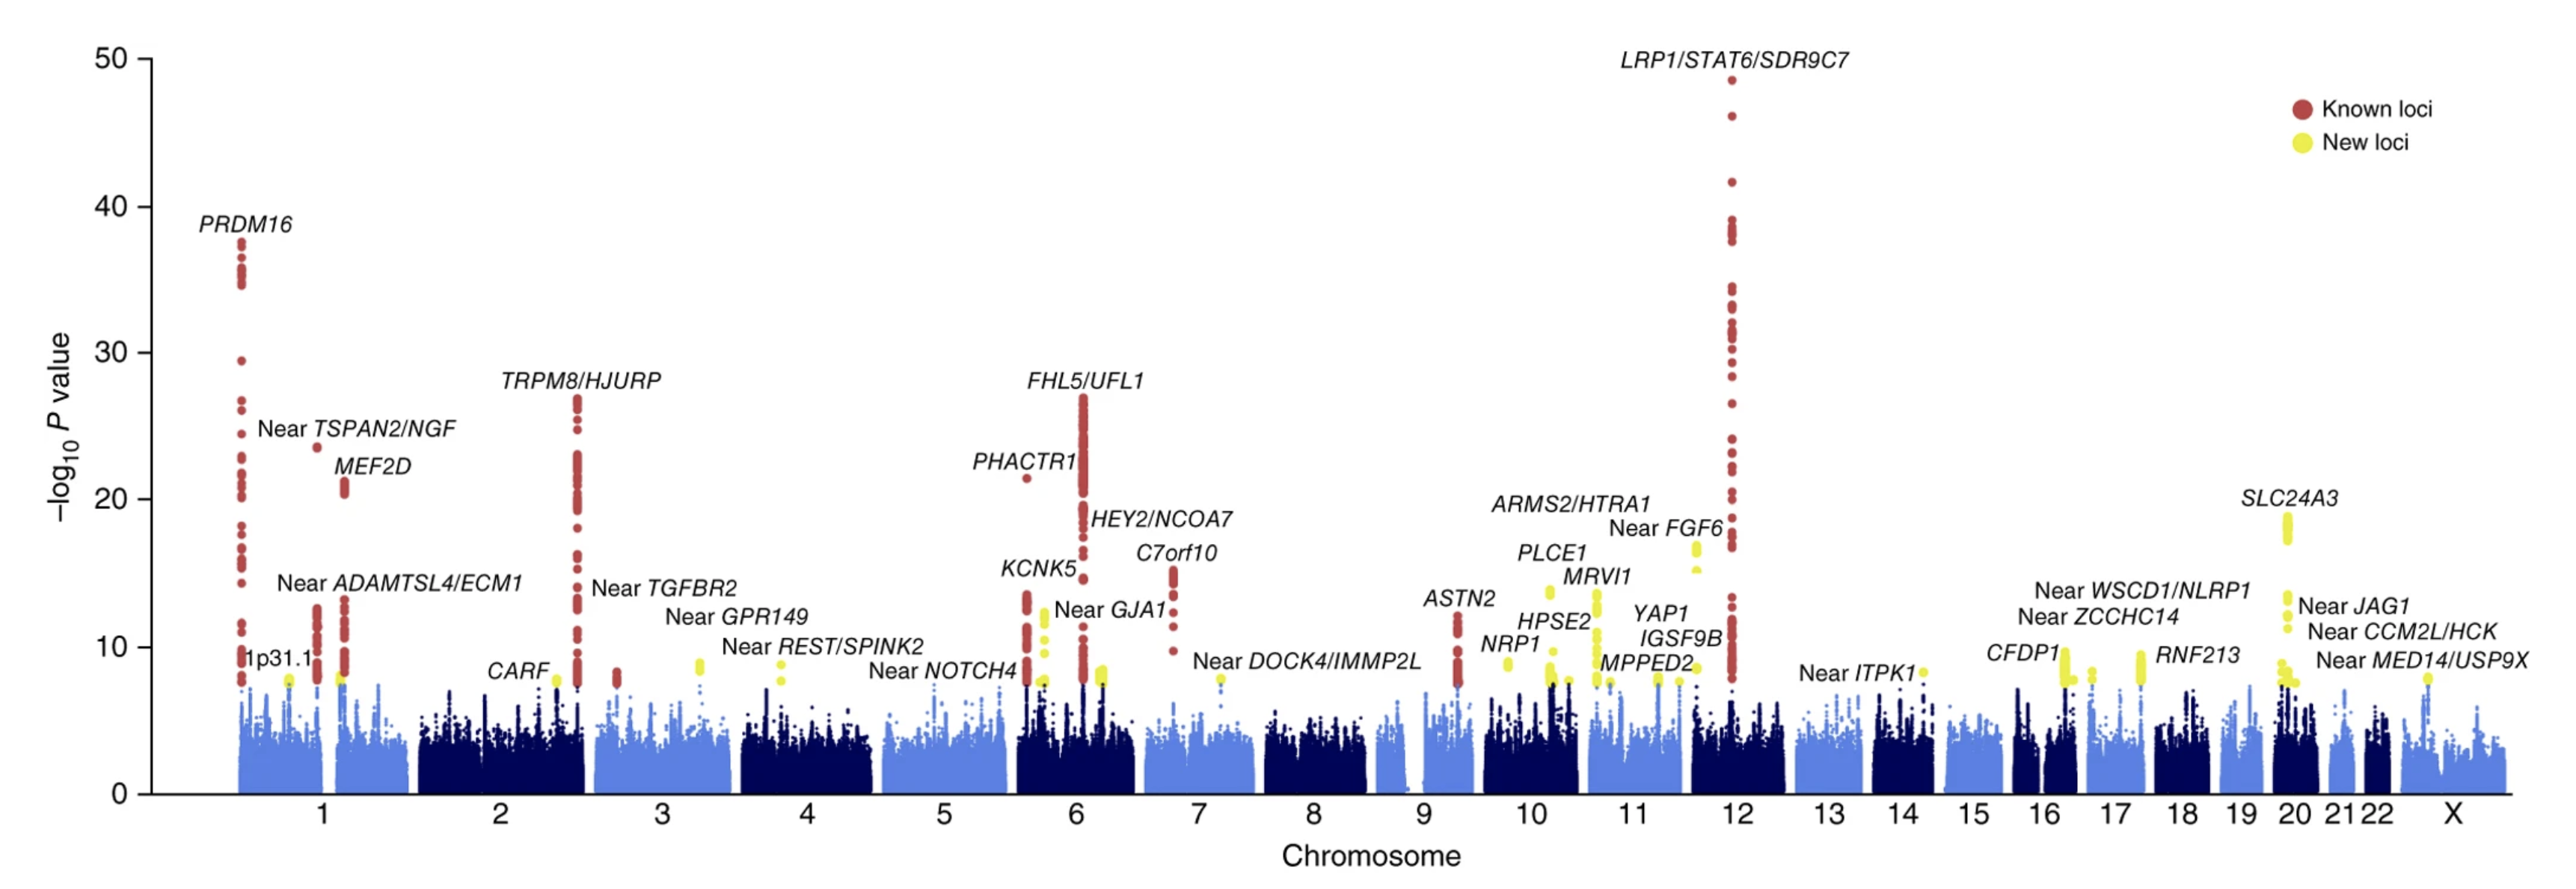
<figcaption aria-hidden="true">Figure 3: Manhattan plot from GWAS study
on migraines by <span class="citation"
data-cites="gormley_meta-analysis_2016">Gormley et al.
(2016)</span>.</figcaption>
</figure>

A third type of GWAS, known as *Trait GWAS*, focuses on investigating
variants linked to specific traits or characteristics that are not
quantitative but may not necessarily be a disease (e.g., eye color, hair
texture, response to medicaments, etc. ).

## Overview of GWAS Steps

The aim of genome‐wide association studies (GWAS) is to identify single
nucleotide polymorphisms (SNPs)-of which the allele frequencies vary
systematically-as a function of phenotypic trait values (e.g., between
cases with schizophrenia and healthy controls, or between individuals
with high vs. low scores on neuroticism). The identification of
trait‐associated SNPs can provide new insights into the biological
mechanisms underlying these phenotypes. Advances in technology have made
it possible to study the effects of numerous SNPs spread across the
genome. Before diving into the procedure, let’s review some essential
concepts. The typical steps involved in a GWAS are illustrated in the
figure below:

<figure>
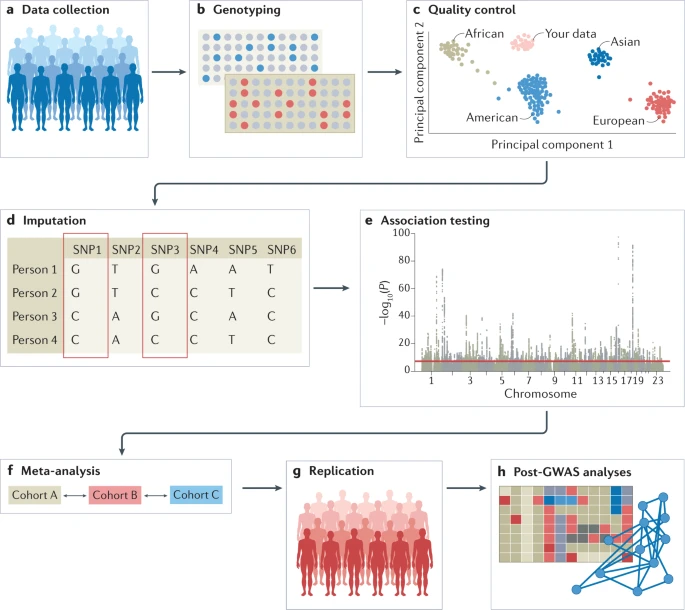
<figcaption aria-hidden="true">Figure 4: Overview of GWAS Steps <span
class="citation" data-cites="uffelmann_genome-wide_2021">(Uffelmann et
al. 2021)</span></figcaption>
</figure>

-   **a) Data Collection**: Data can be collected from study cohorts,
    but there is also valuable genetic and phenotypic information that
    can be used from biobanks or repositories. Depending on the study’s
    focus, various data collection methods will be used, including
    questionnaires, clinical assessments, biological samples, or
    anthropometric measurements. Comprehensive data will allow
    researchers to investigate the relationships between genetic
    factors, environmental exposures, and health outcomes. Confounders
    need to be carefully considered and recruitment strategies must not
    introduce biases such as collider bias.

-   **b) Genotyping**: Genotypic data can be collected using microarrays
    to capture common variants, or next-generation sequencing methods
    for whole-genome sequencing (WGS) or whole-exome sequencing (WES).
    The data is saved in specific file formats that can be used for
    downstream analyses.

-   **c) Quality control**: Quality control includes steps both at the
    wet-laboratory stage, such as genotype calling and DNA switches, and
    dry-laboratory steps on called genotypes, involving filtering both
    at the sample and variant level. For instance, poor
    single-nucleotide polymorphisms (SNPs) and samples will be filtered
    out. It is also important to detect population strata in the cohort
    using principal components analyses (PCA). Panel c) of the figure,
    captures the overall genetic diversity and relatedness within the
    study cohort by clustering individuals who are more genetically
    similar.

-   **d) Imputation**: Genotypic data can be phased, and missing
    (“untyped”) genotypes are often imputed using data from reference
    populations like the 1000 Genomes Project or TopMed. It is crucial
    that the reference panel closely matches the ancestry of the
    individuals being imputed for optimal accuracy, while also being
    diverse enough to represent the entire population. In panel d) of
    the figure above, genotypes of SNP1 and SNP3 are imputed based on
    the directly assayed genotypes of other SNPs. Examples of widely
    used imputation software include SHAPEIT, BEAGLE, and IMPUTE2.

-   **e) Association testing**: Genetic association tests are conducted
    for each genetic variant, using an appropriate model (for example,
    additive, non-additive, linear, or logistic regression). Regardless,
    of the approach used, it is important to correct for confounders
    (including population stratification) and control for multiple
    testing. Outputs are scrutinized for unusual patterns, and summary
    statistics are generated.

-   **f) Meta-analysis**: A very large number of individuals is required
    to achieve powerful GWAS. Commonly, to increase sample size, GWAS
    are typically conducted within consortia such as the Psychiatric
    Genomics Consortium, the Genetic Investigation of Anthropometric
    Traits (GIANT) consortium, or the Global Lipids Genetics Consortium.
    This can be especially relevant in under-studied populations. These
    consortia analyze data from multiple cohorts using tools such as
    METAL or GWAMA.

-   **g) Replication**: Results can be validated using internal
    replication or external replication in an independent cohort.
    External replication requires the cohort to be ancestrally matched
    and not share individuals or family members with the discovery
    cohort.

-   **h) Post-GWAS analyses**: In silico analyses involve fine mapping,
    SNP-to-gene mapping, gene-to-function mapping, pathway analysis,
    genetic correlation analysis, mendelian randomization, and polygenic
    risk prediction. Functional hypotheses can be further tested using
    experimental techniques such as CRISPR or massively parallel
    reporter assays, and results can be validated in human trait/disease
    models (not shown in the figure).

## Software overview for each GWAS Steps

Numerous software tools are available for conducting GWAS. [This
table](https://www.nature.com/articles/s43586-021-00056-9/tables/1) by
(Uffelmann et al. 2021) provides an overview of state-of-the-art tools,
categorized by each step in the analysis process.

> **Wrapping up**
>
> This course will cover data collection and genotyping, quality control
> (which will look at factors such as relatedness, population structure,
> and summary statistics), and association testing.
>
> Modern GWAS involves analyzing tens of thousands of individuals and
> millions of genetic variants, requiring specialized software capable
> of handling specific file formats. Among the most commonly used tools
> for this purpose is PLINK, which we will use in the upcoming
> notebooks. Additionally, we will explore advanced tools designed for
> beyond-standard GWAS analysis.

> **Powerful and robust tools**
>
> There are more advanced tools such as LDAK, BOLT-LMM and Regenie. -
> LDAK contains non-standard models for GWAS and PRS analysis which are
> periodically updated. - BOLT-LMM is highly efficient for large
> datasets and more powerful at controlling for false positives due to
> the mixed model approach. - Regenie is written in C++ and fast at
> whole genome regression models on very large genome-wide association
> studies. These tools are computationally more intensive but necessary
> when the size of a study scales up considerably.

# Bibliography

Gormley, Padhraig, Verneri Anttila, Bendik S. Winsvold, Priit Palta,
Tonu Esko, Tune H. Pers, Kai-How Farh, et al. 2016. “Meta-Analysis of
375,000 Individuals Identifies 38 Susceptibility Loci for Migraine.”
*Nature Genetics* 48 (8): 856–66. <https://doi.org/10.1038/ng.3598>.

Locke, Adam E, Bratati Kahali, Sonja I Berndt, Anne E Justice, Tune H
Pers, Felix R Day, Corey Powell, et al. 2015. “Genetic Studies of Body
Mass Index Yield New Insights for Obesity Biology.” *Nature* 518 (7538):
197–206.

Uffelmann, Emil, Qin Qin Huang, Nchangwi Syntia Munung, Jantina de
Vries, Yukinori Okada, Alicia R. Martin, Hilary C. Martin, Tuuli
Lappalainen, and Danielle Posthuma. 2021. “Genome-Wide Association
Studies.” *Nature Reviews Methods Primers* 1 (1): 1–21.
<https://doi.org/10.1038/s43586-021-00056-9>.

Visscher, Peter M, William G Hill, and Naomi R Wray. 2008. “Heritability
in the Genomics Era—Concepts and Misconceptions.” *Nature Reviews
Genetics* 9 (4): 255–66.
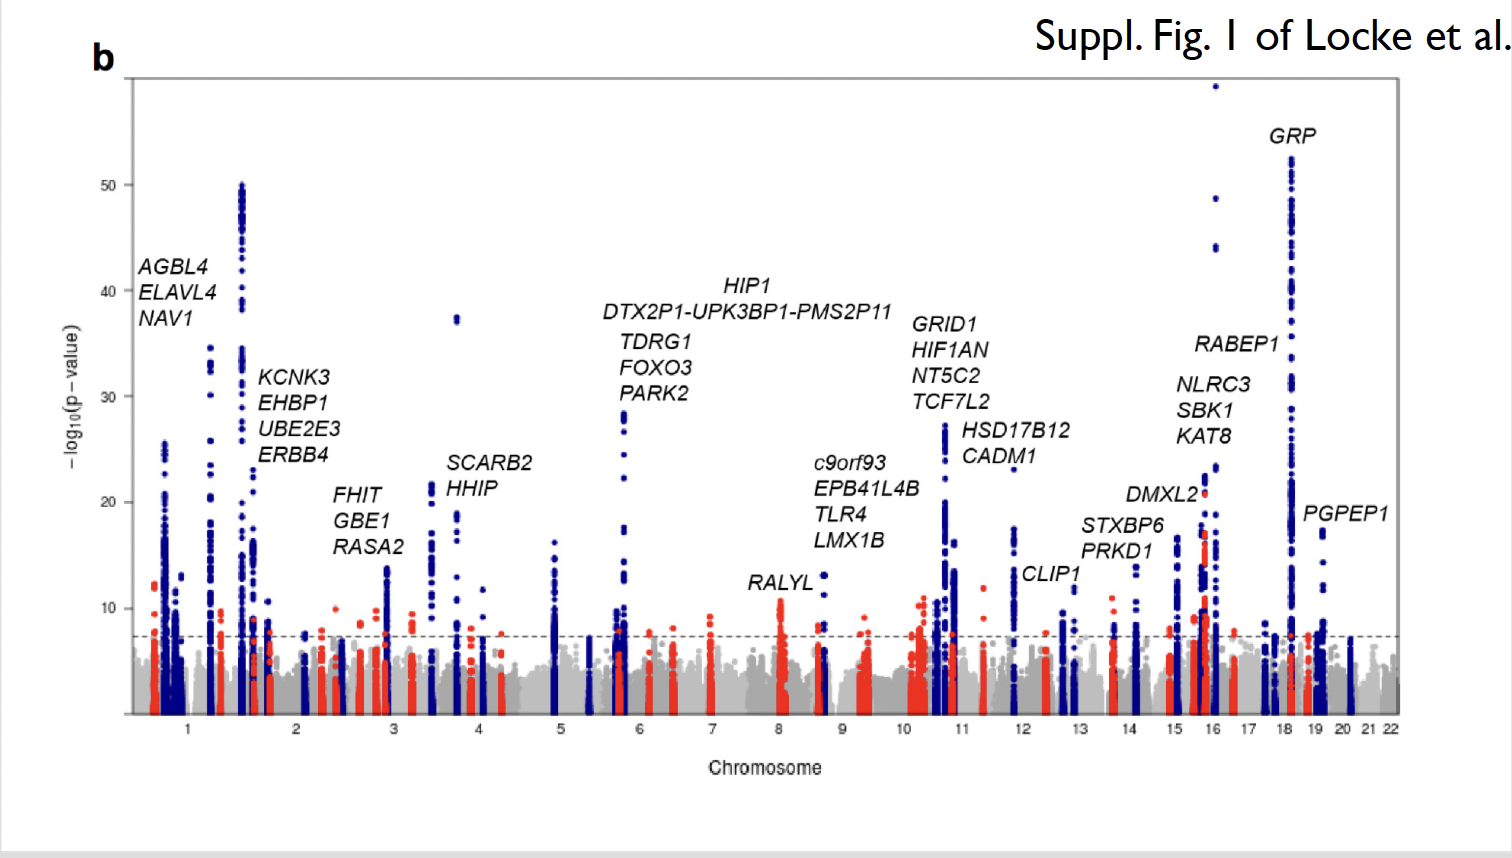